# **Image Captioning - DL Assignment2**

## Assignment Details

Image Captioning is the process of generating textual description of an image. It uses both Natural Language Processing and Computer Vision to generate the captions. The dataset will be in the form [image → captions]. The dataset consists of input images and their corresponding output captions.

In [6]:
!image is available here: https://drive.google.com/file/d/1yTNYy7ObkNn3ilaUB7RL65OkF4iqWlZX/view?usp=sharing

/bin/bash: image: command not found



**Import Libraries/Dataset**

In [ ]:
import pandas as pd
import numpy as np
import re
import os.path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import glob
from PIL import Image
import string
import time
pd.set_option('display.max_colwidth', None)

### Checking GPU availability

In [ ]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")
print("GPU device name:", tf.test.gpu_device_name())

Version:  2.5.0
Eager mode:  True
GPU is available
GPU device name: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Visualization and augmentation:**

##### **Read	the	pickle	file**

In [ ]:
pkl_df = pd.read_pickle("/content/set_4.pkl")

In [ ]:
pkl_list=[]
for d in pkl_df:
  pkl_list.append(re.split('#|\t',d,maxsplit=2))

In [ ]:
mdf = pd.DataFrame(pkl_list,columns =['ImageName', 'id','Caption'])

In [ ]:
mdf = mdf.groupby(['ImageName']).sum()
mdf.drop(columns=['id'],inplace=True)
mdf.reset_index(inplace=True)

In [ ]:
mdf.head()

,ImageName,Caption
0,1000268201_693b08cb0e.jpg,A girl go into a wooden building .A child in a pink dress be climb up a set of stair in an entry way .A little girl climb into a wooden playhouse .A little girl climb the stair to her playhouse .A little girl in a pink dress go into a wooden cabin .
1,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog play with each other on a road .A black dog and a white dog with brown spot be stare at each other in a street .Two dog on pavement move toward each other .
2,1002674143_1b742ab4b8.jpg,There be a girl with pigtail sit in front of a rainbow paint .A little girl be sit in front of a large painted rainbow .
3,1003163366_44323f5815.jpg,A man lay on a bench while his dog sit by him .A man lay on a bench to which a white dog be also tie .A shirtless man lie on a park bench with his dog .man lay on bench hold leash of dog sit on ground
4,1007129816_e794419615.jpg,A man wear an orange hat and glasses .A man in an orange hat star at something .A man with pierced ear be wear glasses and an orange hat .


### **Image	dataset**

In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Flicker8k_Dataset'

**Convert the data into the correct format which could be used for ML model.**

In [ ]:
from tqdm import tqdm
image_dict = {}
for filename in tqdm(glob.glob('*.jpg')):
    img=load_img(filename,target_size=(224,224))
    image_dict[filename]=img

100%|██████████| 8091/8091 [46:45<00:00,  2.88it/s]


In [ ]:
len(image_dict)

8091

In [ ]:
dic={}
for i in mdf.ImageName:
  for j in image_dict:
    if i in j:
      dic[i]=image_dict[j]

In [ ]:
df_test = pd.DataFrame.from_dict(dic,orient='index',columns=['Image'])
df_test.reset_index(inplace=True)
df_test.rename(columns={'index':'ImageName'},inplace=True)

In [ ]:
main_df = pd.merge(mdf,df_test,on=['ImageName'])

In [ ]:
main_df.head()

,ImageName,Caption,Image
0,1000268201_693b08cb0e.jpg,A girl go into a wooden building .A child in a pink dress be climb up a set of stair in an entry way .A little girl climb into a wooden playhouse .A little girl climb the stair to her playhouse .A little girl in a pink dress go into a wooden cabin .,<PIL.Image.Image image mode=RGB size=224x224 at 0x7F069F0719D0>
1,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog play with each other on a road .A black dog and a white dog with brown spot be stare at each other in a street .Two dog on pavement move toward each other .,<PIL.Image.Image image mode=RGB size=224x224 at 0x7F069EEF1550>
2,1002674143_1b742ab4b8.jpg,There be a girl with pigtail sit in front of a rainbow paint .A little girl be sit in front of a large painted rainbow .,<PIL.Image.Image image mode=RGB size=224x224 at 0x7F069F0191D0>
3,1003163366_44323f5815.jpg,A man lay on a bench while his dog sit by him .A man lay on a bench to which a white dog be also tie .A shirtless man lie on a park bench with his dog .man lay on bench hold leash of dog sit on ground,<PIL.Image.Image image mode=RGB size=224x224 at 0x7F069F04C9D0>
4,1007129816_e794419615.jpg,A man wear an orange hat and glasses .A man in an orange hat star at something .A man with pierced ear be wear glasses and an orange hat .,<PIL.Image.Image image mode=RGB size=224x224 at 0x7F069EFB2950>


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032 entries, 0 to 8031
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImageName  8032 non-null   object
 1   Caption    8032 non-null   object
 2   Image      8032 non-null   object
dtypes: object(3)
memory usage: 251.0+ KB


### **Plot at least two samples and their captions (use matplotlib/seaborn/any other library)**

Caption: ['A child in a pink dress be climb up a set of stair in an entry way ', 'A little girl climb into a wooden playhouse ', 'A girl go into a wooden building ', 'A little girl in a pink dress go into a wooden cabin ']


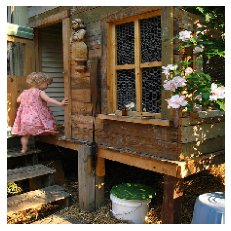

Caption: ['Two dog of different breed look at each other on a road ']


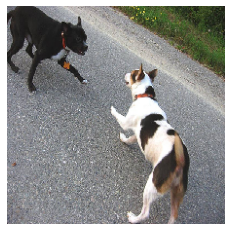

Caption: ['There be a girl with pigtail sit in front of a rainbow paint ']


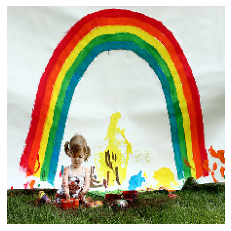

Caption: ['man lay on bench hold leash of dog sit on grounda man sleep on a bench outside with a white and black dog sit next to him ', 'A shirtless man lie on a park bench with his dog ', 'A man lay on a bench to which a white dog be also tie ', 'A man lay on a bench while his dog sit by him ']


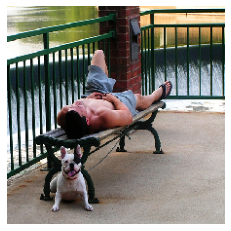

Caption: ['A man with glasses be wear a beer can crochet hat ', 'A man wear an orange hat and glasses ']


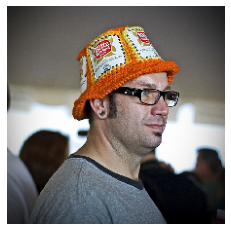

In [ ]:
for i in range(len(main_df.head())):
  print("Caption: "+ str(main_df['Caption'][i].split(".")[:-1]))
  plt.imshow(main_df['Image'][i])
  plt.axis(False)
  plt.show()

### **Bring	the	train	and	test data in the required format**

In [ ]:
image = main_df['Image']
for i in range(len(image)):
  image[i]=np.asarray(image[i])

In [ ]:
from sklearn.model_selection import train_test_split
# keeping 50% size, as colab session crashes if we increase the train size
train, test = train_test_split(main_df, test_size=0.5)

In [ ]:
caption_dict={}
for i in range(len(train)):
  caption_dict[train.ImageName.values[i]]=["START "+sent.strip()+" END" for sent in train.Caption.values[i].lower().split(".")][:-1]

In [ ]:
caption_dict.get('1000268201_693b08cb0e.jpg')

['START a girl go into a wooden building END',
 'START a child in a pink dress be climb up a set of stair in an entry way END',
 'START a little girl climb into a wooden playhouse END',
 'START a little girl climb the stair to her playhouse END',
 'START a little girl in a pink dress go into a wooden cabin END']

In [ ]:
count_words = {}
count=1
for k,vv in caption_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
              count_words[word] = count
              count +=1

In [ ]:
len(count_words)

4453

In [ ]:
for k,vv in caption_dict.items():
    for v in vv:
        encode=[]
        for word in v.split():
          encode.append(count_words[word])
        caption_dict[k][vv.index(v)]=encode

In [ ]:
caption_dict.get('1000268201_693b08cb0e.jpg')

[[1, 2, 12, 473, 85, 2, 72, 382, 11],
 [1,
  2,
  37,
  4,
  2,
  249,
  119,
  38,
  168,
  158,
  2,
  182,
  17,
  181,
  4,
  223,
  1356,
  457,
  11],
 [1, 2, 331, 12, 168, 85, 2, 72, 1357, 11],
 [1, 2, 331, 12, 168, 9, 181, 78, 210, 1357, 11],
 [1, 2, 331, 12, 4, 2, 249, 119, 473, 85, 2, 72, 1358, 11]]

**Model Building**

##### **Use Pretrained Resnet-50 model trained on ImageNet dataset**

In [ ]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50()

102973440/102967424 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
image_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

### **Bring the train in the required format.**

In [ ]:
image_feat = {}
for im in range(len(train)):
  img = train['Image'].values[im].reshape(1,224,224,3)
  pred = image_model.predict(img).reshape(2048,)
  image_feat[train.ImageName.values[im]] = pred

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in caption_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)

In [ ]:
MAX_LEN

46

In [ ]:
VOCAB_SIZE = len(count_words)
def generator(photo, caption):
    n_samples = 0
    X = []
    y_in = []
    y_out = []
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
              try:
                X.append(photo[k])
                in_seq= [v[:i]]
                out_seq = v[i]
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]
                y_in.append(in_seq)
                y_out.append(out_seq)
              except:
                pass
            
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(image_feat, caption_dict)

In [ ]:
X = np.asarray(X)
y_in = np.asarray(y_in)
y_out = np.asarray(y_out)

In [ ]:
X.shape,y_in.shape,y_out.shape

((143214, 2048), (143214, 46), (143214, 4454))

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Concatenate

### **Four(4) layered RNN - We are using LSTM as it is an RNN architecture**

**Add one layer of dropout at the appropriate position and give reasons.**

Adding **L2 regularization** to all the **RNN** layers and one layer of 20% dropout - adding before last layer of **LSTM** abecause they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting. However, since it's a stochastic regularization technique, we can really place it everywhere.

**Choose the appropriate activation function for all the layers.**

Adding **softmax** as appropriate activation function - **Adam** optimizer as it converges really faster and adding **categorical crossentropy** as loss function with **accuracy** as performance metric

### **Give reasons for the choice of learning rate and its value:** Adding learning rate as 0.0001 as it was hypertuned and gave better results  


**Model Compilation** 

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words) + 1
image_model1 = Sequential()
image_model1.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model1.add(Dropout(0.2))
image_model1.add(RepeatVector(max_len))
language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(128, kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001), return_sequences=True))
language_model.add(Dropout(0.2))
language_model.add(TimeDistributed(Dense(embedding_size)))
conca = Concatenate()([image_model1.output, language_model.output])2
#Add L2 regularization to all the RNN layers.
x = LSTM(128, kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001), return_sequences=True)(conca)
x = LSTM(128, kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001), return_sequences=False)(x)
out = Dense(vocab_size,activation='softmax')(x)
model = Model(inputs=[image_model1.input, language_model.input], outputs = out)

#Compiling the model with above parameters
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])
#Print the model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  [(None, 46)]         0                                            
__________________________________________________________________________________________________
dense_3_input (InputLayer)      [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 46, 128)      570112      embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          262272      dense_3_input[0][0]              
____________________________________________________________________________________________

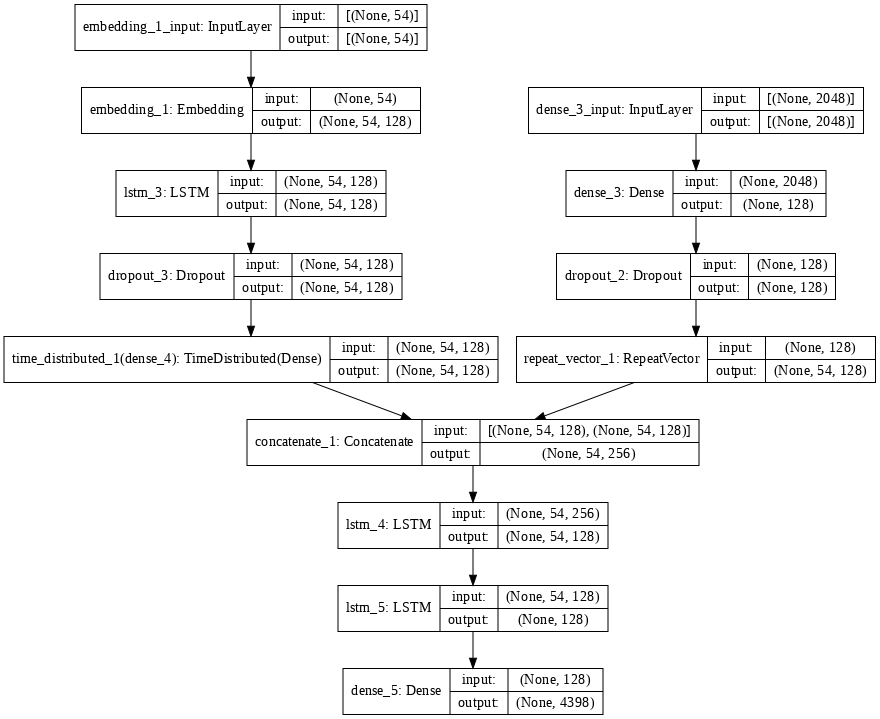

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,dpi=72)

**Model Training**

**Print the train and validation loss for each epoch. Use the appropriate batch size**

In [ ]:
start = time.time()
history = model.fit([X, y_in], y_out, batch_size=720, epochs=35, validation_split=0.1, use_multiprocessing=True)
end = time.time()

Epoch 1/35
180/180 [==============================] - 33s 146ms/step - loss: 5.5007 - accuracy: 0.1421 - val_loss: 5.2608 - val_accuracy: 0.1456
Epoch 2/35
180/180 [==============================] - 25s 136ms/step - loss: 5.2176 - accuracy: 0.1435 - val_loss: 5.2586 - val_accuracy: 0.1456
Epoch 3/35
180/180 [==============================] - 25s 137ms/step - loss: 5.1917 - accuracy: 0.1435 - val_loss: 5.2077 - val_accuracy: 0.1456
Epoch 4/35
180/180 [==============================] - 25s 138ms/step - loss: 5.1286 - accuracy: 0.1435 - val_loss: 5.1775 - val_accuracy: 0.1456
Epoch 5/35
180/180 [==============================] - 25s 138ms/step - loss: 5.0974 - accuracy: 0.1432 - val_loss: 5.1727 - val_accuracy: 0.1455
Epoch 6/35
180/180 [==============================] - 25s 136ms/step - loss: 5.0780 - accuracy: 0.1431 - val_loss: 5.1512 - val_accuracy: 0.1456
Epoch 7/35
180/180 [==============================] - 25s 136ms/step - loss: 5.0485 - accuracy: 0.1435 - val_loss: 5.1293 - val_ac

**total time** taken for training: ~15 mins

In [ ]:
# Print the total time taken for training
print("Total time taken for training: ", (end - start)/60, "mins")

Total time taken for training:  15.453375518321991 mins


**Plot the loss and accuracy history graphs for both train and validation set**

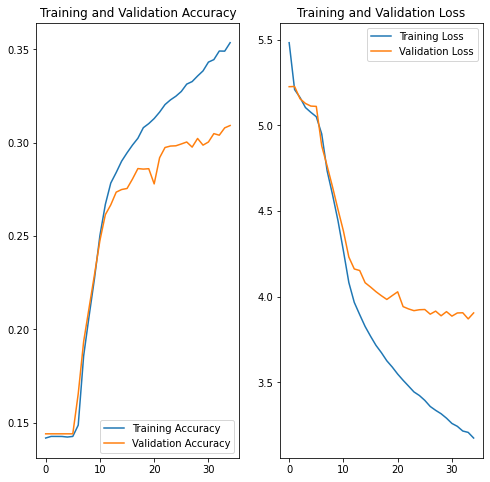

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
inv_dict = {v:k for k, v in count_words.items()}

In [ ]:
def getImage(x):
    test_img = np.reshape(x, (1,224,224,3))
    return test_img

**Model Evaluation: Take a random image from google and generate caption for that image**

In [ ]:
testImg = load_img('/content/test_image3.jpg',target_size=(224,224,3))

Text(0.5, 0, 'a man in a bike in a bike')

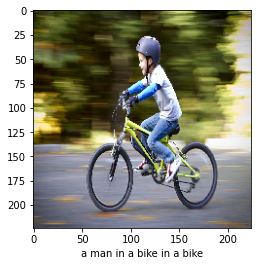

In [ ]:
test_pred = image_model.predict(getImage(testImg)).reshape(1,2048)
text_inp = ['START']
count = 0
caption = ''
while count < 25:
            count += 1
            encoded = []
            for i in text_inp:
                encoded.append(count_words[i])
            encoded = [encoded]
            encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
            prediction = np.argmax(model.predict([test_pred, encoded]))
            sampled_word = inv_dict[prediction]
            caption = caption + ' ' + sampled_word
            if sampled_word == 'END':
                break
            text_inp.append(sampled_word)
plt.figure()
plt.imshow(testImg)
plt.xlabel(caption.replace("END","").strip())